# Dark Matter Model Setup

In this notebook we detail how the differential cross-sections for the Scalar Singlet/Silveira-Zee dark matter model are used with GammaBayes with example implementations near the end.

## Extracting the branching fractions and generating the energy distribution

In this section we detail how the differential cross-sections are converted into the `darkSUSY_BFs_cleaned.csv` file within the `GammaBayes` package. The `BranchingFactors.dat` file is not available through GitHub due to it being a relatively large file but if wanted can be acquired by emailing me, Liam Pinchbeck, at my email address `Liam.Pinchbeck@monash.edu`.

Let's first import the necessary functions and set the path to the file containing the `darkSUSY` differential cross-sections.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from scipy import interpolate, integrate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
package_dir = "../gammabayes"
branchingfractions_dtf = pd.read_csv(package_dir+'/BFCalc/darkSUSY_BFs/BranchingFactors.dat', delimiter='\t')


branchingfractions = np.squeeze(np.array(list(branchingfractions_dtf.iloc)))[1:]
branchingfractions[0]

'   10.000000000000000        1.0000000000000000E-008   0.0000000000000000        1.0378850333402099E-049   0.0000000000000000        4.4365241407128310E-045   0.0000000000000000        1.1961342122771007E-042   1.0731768960356098E-047   4.2927058455958292E-047   3.9703060050698629E-042   1.2648359410883449E-044   0.0000000000000000        1.8907702685825177E-041   0.0000000000000000        0.0000000000000000        0.0000000000000000        8.4828835412886704E-044   0.0000000000000000        0.0000000000000000        0.0000000000000000     '

Once extracted we convert the names of the particle outputs to a more usable form within the `variablesdict` object.

In [2]:
variables = [channel.strip() for channel in branchingfractions_dtf.columns[0].split(' | ')]
variablesdict = {idx:channel.replace(' + ','').replace('bar','').replace('anti-','') for idx, channel in enumerate(variables)}
darkSUSYchannel_list = list(variablesdict.values())

We then extract the numerical values of the differential cross-sections within a numpy file. This is done so that we can perform array operations, primarily `np.sum`, on the object to turn the differential cross-sections into annihilation ratios by dividing them by the total cross section defined as the sum of all the partial cross-sections.

In [3]:
splitBFs = [np.array(unsplitBF.split(' ')) for unsplitBF in branchingfractions]
splitBFs = np.array([splitBF[np.where(splitBF)] for splitBF in splitBFs]).astype(float)
splitBFs

array([[1.00000000e+01, 1.00000000e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07922646e+01, 1.00000000e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16472974e+01, 1.00000000e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.58568270e+05, 1.07952481e+03, 0.00000000e+00, ...,
        9.17703938e-26, 0.00000000e+00, 0.00000000e+00],
       [9.26589591e+05, 1.07952481e+03, 0.00000000e+00, ...,
        7.87931269e-26, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+06, 1.07952481e+03, 0.00000000e+00, ...,
        6.76507373e-26, 0.00000000e+00, 0.00000000e+00]])

Let's now store all of this within a pandas dataframe and save it to the working directory.

In [4]:
df = pd.DataFrame(splitBFs, columns=list(variablesdict.values()))
df.to_csv('../gammabayes/BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', index=False, header=True, sep=' ')

From here this is what one can do with files contained within the publically avaiable package.

In [5]:
df = pd.read_csv('darkSUSY_BFs_cleaned.csv', delimiter=' ')

Now that we've done all this let's have a look at the first few rows of the cleaned data.

In [6]:
df.head()

,mS [GeV],lahS,nuenue,e+e-,numunumu,mu+mu-,nutaunutau,tau+tau-,uu,dd,...,ss,tt,bb,gammagamma,W+W-,ZZ,gg,HH,Zgamma,hadrons (below confinement scale)
0,10.000000,1.000000e-08,0.0,1.037885e-49,0.0,4.436524e-45,0.0,1.196134e-42,1.073177e-47,4.292706e-47,...,1.264836e-44,0.0,1.890770e-41,0.000000e+00,0.000000e+00,0.000000e+00,8.482884e-44,0.0,0.0,0.0
1,10.792265,1.000000e-08,0.0,1.046890e-49,0.0,4.407819e-45,0.0,1.221221e-42,1.082488e-47,4.329951e-47,...,6.817516e-45,0.0,1.609609e-41,9.750127e-46,1.823328e-48,5.988314e-49,4.730270e-43,0.0,0.0,0.0
2,11.647297,1.000000e-08,0.0,1.057527e-49,0.0,4.450677e-45,0.0,1.240166e-42,1.093487e-47,4.373946e-47,...,6.737022e-45,0.0,1.625305e-41,1.146854e-45,2.924788e-48,9.584917e-49,4.295746e-43,0.0,0.0,0.0
3,12.570072,1.000000e-08,0.0,1.070122e-49,0.0,4.500950e-45,0.0,1.260514e-42,1.106510e-47,4.426039e-47,...,6.673289e-45,0.0,1.636777e-41,1.349072e-45,4.695867e-48,1.536033e-48,3.933667e-43,0.0,0.0,0.0
4,13.565954,1.000000e-08,0.0,1.085077e-49,0.0,4.562140e-45,0.0,1.282965e-42,1.121974e-47,4.487895e-47,...,6.624157e-45,0.0,1.646162e-41,1.589148e-45,7.591720e-48,2.478274e-48,3.653652e-43,0.0,0.0,0.0


One can see that the first two columns contain the mass [GeV] and Higgs Coupling values for the differential cross-sections for the channels shown in the following columns.

In [7]:
list(df.columns[2:])

['nuenue',
 'e+e-',
 'numunumu',
 'mu+mu-',
 'nutaunutau',
 'tau+tau-',
 'uu',
 'dd',
 'cc',
 'ss',
 'tt',
 'bb',
 'gammagamma',
 'W+W-',
 'ZZ',
 'gg',
 'HH',
 'Zgamma',
 'hadrons (below confinement scale)']

Let's plot all the branching fractions for these channels remembering that we've stored the differential cross-sections (difference of normalisation so doesn't matter when doing spectral analysis) so we need to divide by the sum of the differential cross-sections for all the final channels.

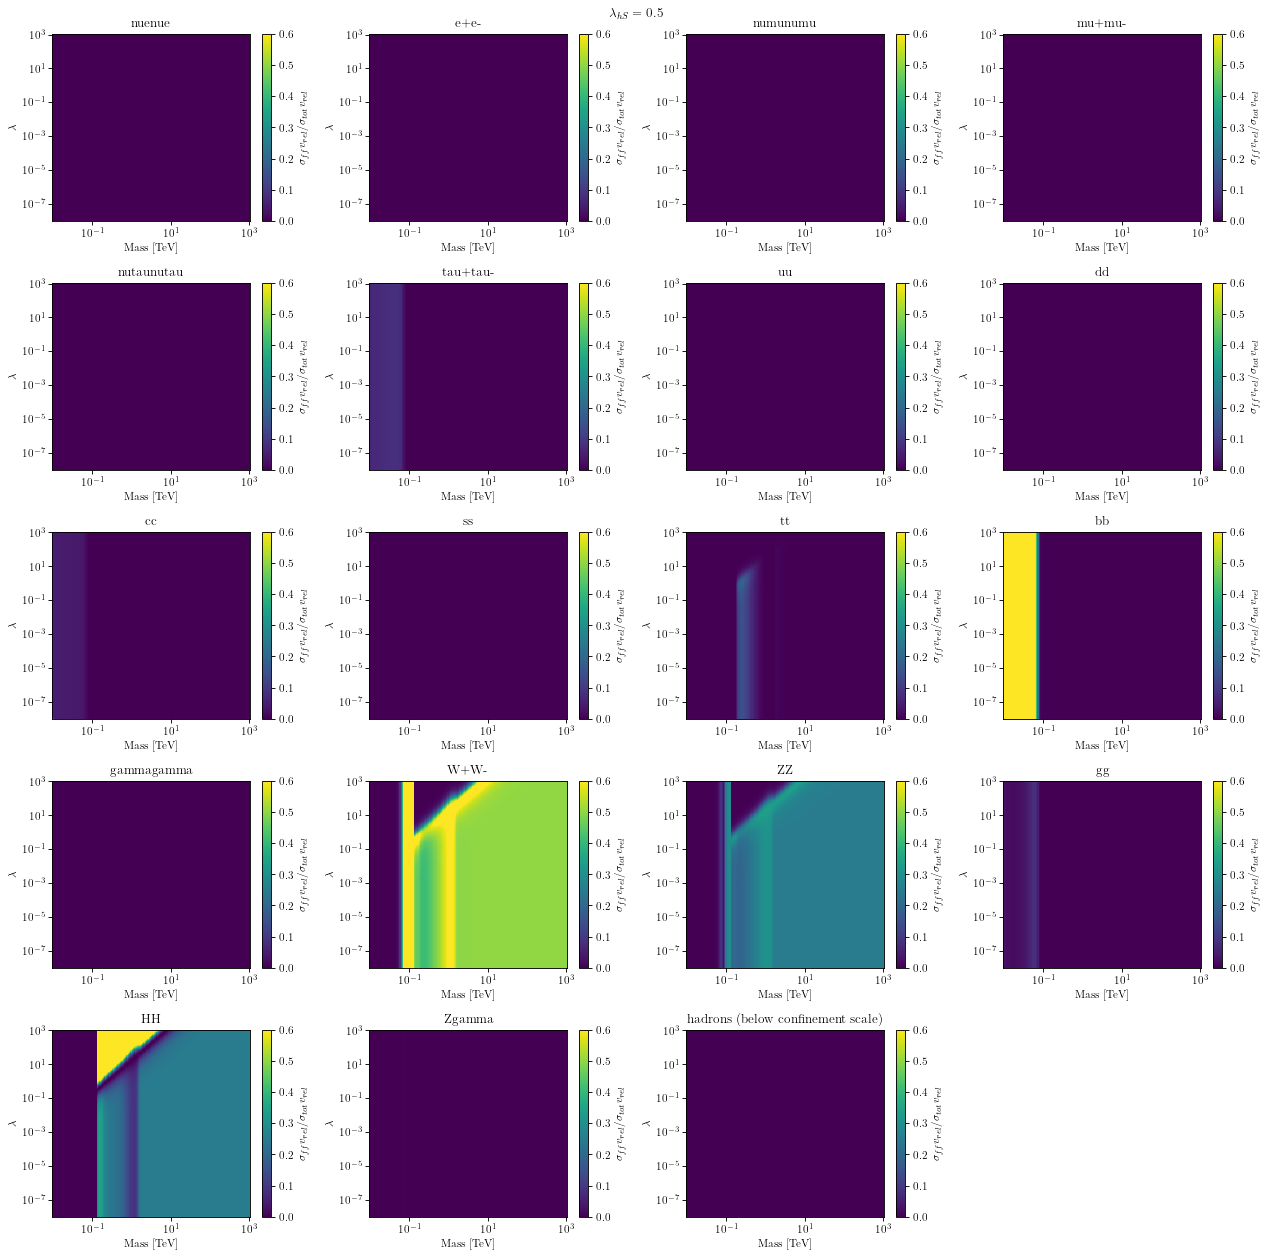

In [8]:
massvalues = np.unique(df.iloc[:,0])/1000 # Now they're in TeV
lambdavalues = np.unique(df.iloc[:,1])


plt.figure(figsize=(16,16), dpi=80)
plt.suptitle(r"$\lambda_{hS}=0.5$")
for idx, channel_name in enumerate(list(df.columns[2:])):
    plt.subplot(5,4, idx+1)
    plt.title(f"{channel_name}")
    plt.pcolormesh(massvalues, lambdavalues, 
                   (df[channel_name].to_numpy()/np.sum(df.iloc[:,2:].to_numpy(),axis=1)).reshape(lambdavalues.shape[0], massvalues.shape[0]), vmin=0, vmax=0.6)#,
                #    norm=LogNorm(vmin=1e-50))
    plt.xlabel('Mass [TeV]')
    plt.ylabel('$\lambda$')
    plt.loglog()
    plt.colorbar(label=r'$\sigma_{ff} v_{rel}/\sigma_{tot} v_{rel}$')
plt.tight_layout()
plt.show()

Let's create interpolation functions for all of these plots and store everthing within a nice python dictionary.

In [238]:
import sys


sys.path.append("../gammabayes")

from utils.utils import log10eaxistrue, longitudeaxistrue, latitudeaxistrue, aefffull, aeff_efficient


partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((df.iloc[:,0].to_numpy()/1000, df.iloc[:,1].to_numpy()),df.iloc[:,2+idx].to_numpy()) for idx, channel in enumerate(list(df.columns[2:]))}
print(partial_sigmav_interpolator_dictionary)



{'nuenue': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15e96ddd0>, 'e+e-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f88cbd0>, 'numunumu': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f7fbc10>, 'mu+mu-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f7fb390>, 'nutaunutau': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f7f93d0>, 'tau+tau-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f7fa810>, 'uu': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f7faed0>, 'dd': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f7f86d0>, 'cc': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15f7f9010>, 'ss': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15fed6090>, 'tt': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15fed5010>, 'bb': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x15fed6610>, 'gammagamma': <scipy.

The following cell contains a dictionary where you the keys corresond to the channel names contained within darkSUSY and the values correspond to the names of theses channels as contained within the PPPC spectra table.

In [271]:
from BFCalc.createspectragrids import singlechannel_diffflux

darkSUSY_to_spectra_name_converter = {
    "nuenue":"nu_e",
    "e+e-": "e",
    "numunumu":"nu_mu",
    "mu+mu-":"mu",
    'nutaunutau':"nu_tau",
    "tau+tau-":"tau",
    "cc": "c",
    "bb": "b",
    "tt": "t",
    "W+W-": "W",
    "ZZ": "Z",
    "gg": "g",
    "gammagamma": "gamma",
    "HH": "h",
}


Now that we have that we will extract all the spectra and create linear interpolators for each.

In [273]:
channelfuncdictionary = {}
modulefolderpath = '../gammabayes/BFCalc'
griddata_massvalues          = np.load(modulefolderpath+f"/griddata/massvals_massenergy_diffflux_grid.npy")/1e3
griddata_log10xvals        = np.load(modulefolderpath+f"/griddata/log10xvals_massenergy_diffflux_grid.npy")
import time
for darkSUSYchannel in df.columns[2:]:
    try:
        gammapychannel = darkSUSY_to_spectra_name_converter[darkSUSYchannel]
        tempspectragrid = np.load(modulefolderpath+f"/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
    
        channelfuncdictionary[darkSUSYchannel] = interpolate.RegularGridInterpolator(
            points=(np.log10(griddata_massvalues), griddata_log10xvals), 
            values = np.asarray(tempspectragrid),
            bounds_error=False,
            fill_value=1e-3000)

    except:
        
        # For the channels that are within darkSUSY data but not PPPC table we simply set the spectra to 0
            # As the differential cross-sections will be 0 anyway
        print(f"The channel {darkSUSYchannel} is not present in the PPPC table.")
        channelfuncdictionary[darkSUSYchannel] = lambda input: input[1]*0
    

The channel uu is not present in the PPPC table.
The channel dd is not present in the PPPC table.
The channel ss is not present in the PPPC table.
The channel Zgamma is not present in the PPPC table.
The channel hadrons (below confinement scale) is not present in the PPPC table.


Let's compare some of these spectra for the same mass.

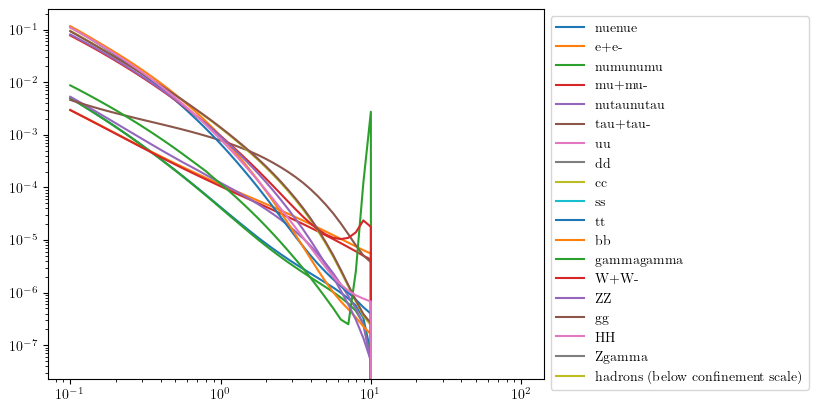

In [276]:

plt.figure()
for channel in channelfuncdictionary.keys():
    plt.plot(10**np.linspace(-1,2,61), 
            np.squeeze(channelfuncdictionary[channel]((1, np.linspace(-1,2,61)-1))),
            label=channel)
plt.loglog()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Although messy due to number of channels, we can see that each channel has a slightly different spectra owing to different decay pathways each has and other interactions and reactions.

Now let's combine the two in some functions by multiplying the spectra from each channel with the relevant differential cross-section and adding them all together to get the total dark matter spectra.

In [277]:
channel_test_names = list(partial_sigmav_interpolator_dictionary.keys())
from matplotlib.pyplot import get_cmap
from scipy import special

cmap = get_cmap('cool')
# partial_sigmav_interpolator_dictionary, channelfuncdictionary
massvalues_test = np.logspace(-0.8, 2, 3)
couplingvalues_test = np.logspace(-3,0,4)
energyvalues_test = np.logspace(-1,2,901)
# 
spectralvals = lambda massval, couplingval: np.exp(special.logsumexp([np.log(float(partial_sigmav_interpolator_dictionary[channel](massval, couplingval)))+np.log(np.squeeze(channelfuncdictionary[channel]((np.log10(massval), np.log10(energyvalues_test)-np.log10(massval))))) for channel in channel_test_names], axis=0))

lognormspectralvals = lambda massval, couplingval: special.logsumexp(np.log(spectralvals(massval,couplingval))+np.log(energyvalues_test))


Let's do some comparisons for different values of the Higgs coupling constant.

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_8469/80899697.py:151: RuntimeWarning: invalid value encountered in divide
  (np.exp(np.log(spectralvals(testmass, couplingval))-lognormspectralvals(testmass, couplingval))-basespectra)/basespectra,


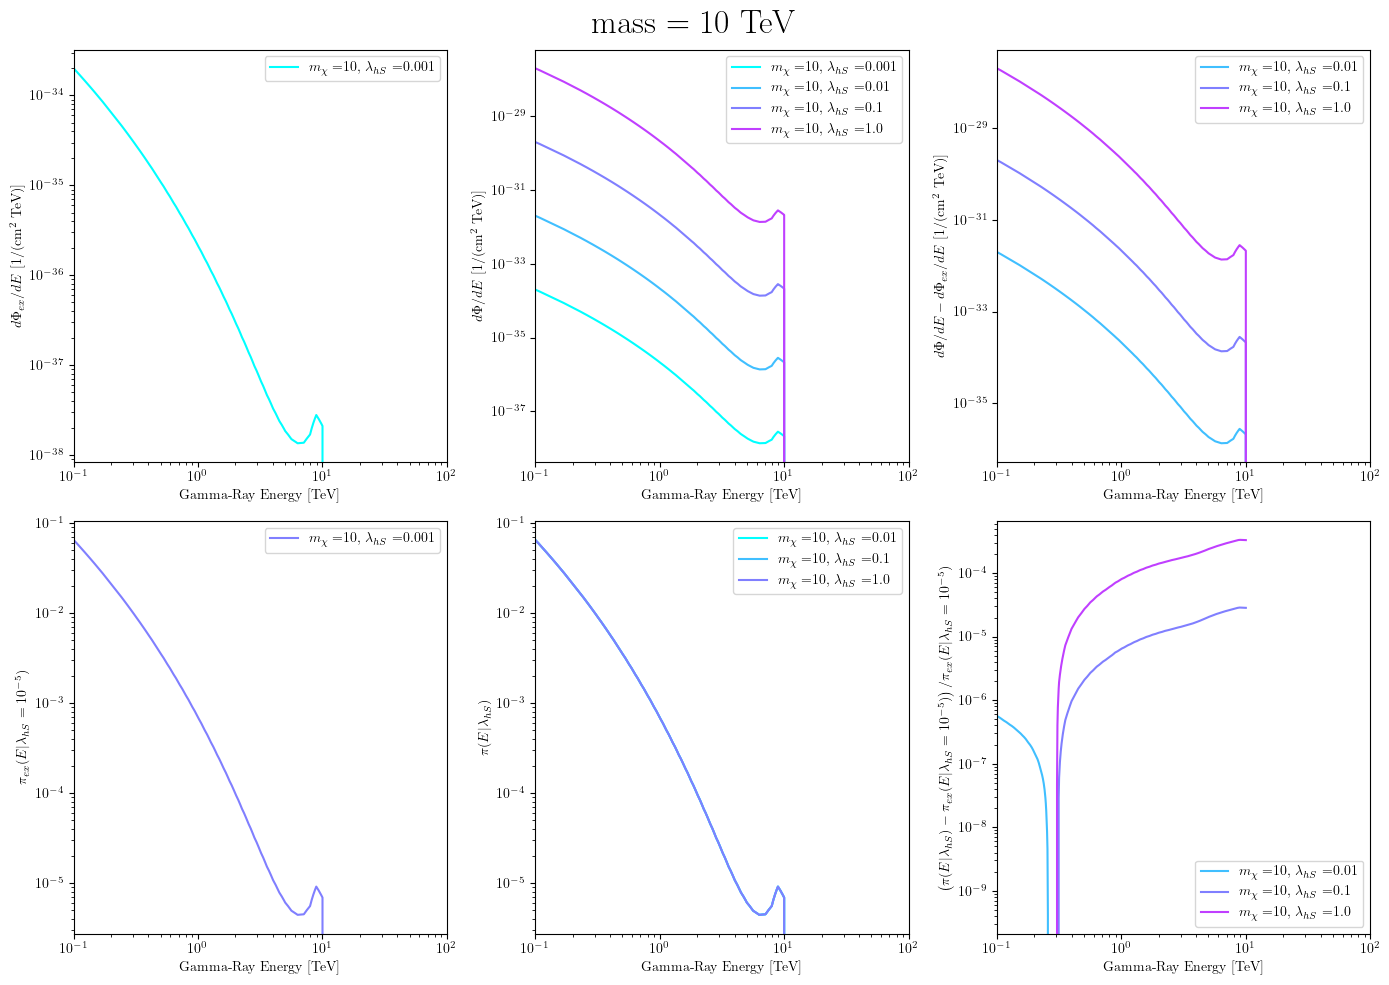

In [278]:
testmass = 10 # Mass in TeV, the original should be 10 TeV



plt.figure(figsize=(14,10))


plt.suptitle(f"mass = {testmass} TeV", fontsize=24)



plt.subplot(2,3,1)
# plt.title('Example spectral flux')

plt.xlim([energyvalues_test[0], energyvalues_test[-1]])


basespectra = spectralvals(testmass, couplingvalues_test[0])


plt.plot(energyvalues_test, 
            basespectra,
            color=cmap(0/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingvalues_test[0]}")

plt.loglog()
plt.legend([r"$\lambda_{hS}=$"+f"{couplingval}" for couplingval in couplingvalues_test])
plt.legend()


plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$d\Phi_{ex}/dE$ [1/(cm$^2$ TeV)]')





plt.subplot(2,3,2)
# plt.title(
# r'''Spectral fluxes
#     for various coupling constant values''')


for counter, couplingval in enumerate(couplingvalues_test):
    plt.xlim([energyvalues_test[0], energyvalues_test[-1]])
    plt.plot(energyvalues_test, 
            np.exp(np.log(spectralvals(testmass, couplingval))),
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
    
    
plt.legend()
plt.loglog()


plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$d\Phi/dE$ [1/(cm$^2$ TeV)]')








plt.subplot(2,3,3)
# plt.title(
# r'''Difference between example 
#     and other spectral fluxes
#     for various coupling constant values''')



basespectra = spectralvals(testmass, couplingvalues_test[0])


for counter, couplingval in enumerate(couplingvalues_test[1:]):
    plt.xlim([energyvalues_test[0], energyvalues_test[-1]])
    plt.plot(energyvalues_test, 
            spectralvals(testmass, couplingval)-basespectra,
            color=cmap((counter+1)/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
    
plt.legend()
plt.loglog()


plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$d\Phi/dE-d\Phi_{ex}/dE$ [1/(cm$^2$ TeV)]')




plt.subplot(2,3,4)


# plt.title(r'Example \textbf{normalised} spectral flux')



plt.xlim([energyvalues_test[0], energyvalues_test[-1]])

basespectra = np.exp(np.log(spectralvals(testmass, couplingvalues_test[0])) - lognormspectralvals(testmass, couplingvalues_test[0]))


plt.plot(energyvalues_test, 
         basespectra,
         color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingvalues_test[0]}")

plt.loglog()
plt.legend([r"$\lambda_{hS}=$"+f"{couplingval}" for couplingval in couplingvalues_test])
plt.legend()
plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$\pi_{ex}(E|\lambda_{hS}=10^{-5})$')





plt.subplot(2,3,5)
# plt.title(
# r'''\textbf{normalised} fluxes
#     for various coupling constant values''')


plt.xlim([energyvalues_test[0], energyvalues_test[-1]])


for counter, couplingval in enumerate(couplingvalues_test[1:]):
    plt.plot(energyvalues_test, 
            np.exp(np.log(spectralvals(testmass, couplingval))-lognormspectralvals(testmass, couplingval)),
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
plt.loglog()
plt.legend()
plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$\pi(E|\lambda_{hS})$')




plt.subplot(2,3,6)
# plt.title(
# r'''Relative difference between example \textbf{normalised} 
#     and other spectral \textbf{normalised} fluxes
#     for various coupling constant values''')


plt.xlim([energyvalues_test[0], energyvalues_test[-1]])

basespectra = np.exp(np.log(spectralvals(testmass, couplingvalues_test[0])) - lognormspectralvals(testmass, couplingvalues_test[0]))

for counter, couplingval in enumerate(couplingvalues_test[1:]):
    plt.plot(energyvalues_test, 
            (np.exp(np.log(spectralvals(testmass, couplingval))-lognormspectralvals(testmass, couplingval))-basespectra)/basespectra,
            color=cmap((counter+1)/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
plt.loglog()
plt.legend()
plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$\left(\pi(E|\lambda_{hS})-\pi_{ex}(E|\lambda_{hS}=10^{-5})\right)/\pi_{ex}(E|\lambda_{hS}=10^{-5})$')


plt.tight_layout()
plt.tight_layout()
plt.show()

One can see that the coupling dictates the normalisation for the differential flux, but if one normalises the spectra, then this normalisation goes away and they are approximately equivalent up to about a 1% difference for specific energies. Feel free to change the `testmass` parameter for yourself to see this applies for any mass.

So this is how we generate the energy distribution for our dark matter spectra, but what about the angular distribution?

## Calculating the differential J factors to get the angular distribution

Now we will generate the differential J factors around the Galactic Centre with the help of `Gammapy`. For detailed documentation on these calculations we recommend visitng their documentation.